# Purpose
## Cleaning Up Data
## Understanding app trends.
## Identifying factors that influence app ratings and price.
## Peform Basic Sentiment Analysis

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
plotly.offline.init_notebook_mode(connected=True) # connected=True means latest version of plotly javascript library will be downloaded.
import plotly.graph_objs as go
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=200, colormap="Set2")
# generate word cloud
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [245]:
# To set the max limit of cols and rows to be displayed. 
pd.set_option('display.max_columns', 114)
pd.set_option('display.max_rows', 114)

In [246]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Cleaning Data

### Clean up Category

In [248]:
# Check 'category' column for any anomaly
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [249]:
df[df['Category'] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [250]:
# We can clearly see that the the cells from Ratings to the end are shifted to the left by one place.
# Lets move them back and place NA in Category.

# Shift every value to the right
df.loc[10472] = df.loc[10472].shift()
# swap the new App value (NA) with the new Category value
df['App'].loc[10472] = df['Category'].loc[10472]
df['Category'].loc[10472] = np.nan

df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

### Cleaning up App column

In [251]:
df['App'].value_counts()


App
ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
8 Ball Pool                                          7
                                                    ..
Fr. Daoud Lamei                                      1
Poop FR                                              1
PLMGSS FR                                            1
List iptv FR                                         1
Kids Paint Free - Drawing Fun                        1
Name: count, Length: 9660, dtype: int64

### Cleaning up Ratings column

In [252]:
# NaN values in the Ratings column
df['Rating'].isna().sum()

np.int64(1474)

In [253]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [254]:
# We see that the the data type of ratings is object, its better to change it to float.

df['Rating'] = pd.to_numeric(df["Rating"], errors='coerce')
df['Rating'].dtype

dtype('float64')

#### Grouping rows by category for further use

In [255]:
# We see a nan value as well, it would makes sense to replace it with the Category median of ratings.
# Lets group the df wrt to 'Category' column
dfCat = df.groupby(['Category'])
dfCat['Rating'].value_counts().head(50)


Category             Rating
ART_AND_DESIGN       4.7       13
                     4.4        8
                     4.1        7
                     4.2        7
                     4.8        5
                     4.3        4
                     4.5        4
                     3.8        3
                     4.0        3
                     4.6        3
                     3.9        2
                     3.2        1
                     3.4        1
                     5.0        1
AUTO_AND_VEHICLES    4.6       11
                     4.0        9
                     4.2        7
                     4.3        7
                     3.9        6
                     4.4        6
                     4.5        5
                     4.8        5
                     4.9        5
                     3.2        2
                     3.5        2
                     3.7        2
                     2.1        1
                     2.6        1
                    

In [256]:
# df['Rating'].fillna(value=df['Rating'].mean(), inplace=True)
# dfCat['Rating'].mean()

# Fill NA values in 'Ratings' with group-wise mean
## Calculate category-wise mean of ratings
category_means = dfCat['Rating'].transform('mean')

## Replace NA values with corresponding category means
df['Rating'] = df['Rating'].fillna(category_means)

df['Rating'].isna().sum()

np.int64(0)

### Cleaning Up Reviews Column

In [257]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6002,), dtype=object)

In [258]:
# The values seem to be fine, we just have to convert them from object(string) type to float type
df['Reviews'] = df['Reviews'].astype(int)
df['Reviews'].dtype

dtype('int64')

### Cleaning up Size  Column

In [259]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [260]:
# Replace "Varies with device" with NaN as we cannot fill the place with some other value.
df['Size'] = df['Size'].replace("Varies with device",np.nan)

In [261]:
# Convert all the value to Mb.
# We just need to divide the Kb values with 1024
# and converting the complete column to float type.
def convert_to_mb(size):
    if pd.isna(size):
        return size
    size = str(size).upper()
    if 'K' in size:
        num = float(size.replace('K', ''))
        return num / 1024
    elif 'M' in size:
        return float(size.replace('M', ''))
    return size

df['Size'] = df['Size'].apply(convert_to_mb)

# # Better Way
# df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
# df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
# df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

df['Size'].unique()

array([1.90000000e+01, 1.40000000e+01, 8.70000000e+00, 2.50000000e+01,
       2.80000000e+00, 5.60000000e+00, 2.90000000e+01, 3.30000000e+01,
       3.10000000e+00, 2.80000000e+01, 1.20000000e+01, 2.00000000e+01,
       2.10000000e+01, 3.70000000e+01, 2.70000000e+00, 5.50000000e+00,
       1.70000000e+01, 3.90000000e+01, 3.10000000e+01, 4.20000000e+00,
       7.00000000e+00, 2.30000000e+01, 6.00000000e+00, 6.10000000e+00,
       4.60000000e+00, 9.20000000e+00, 5.20000000e+00, 1.10000000e+01,
       2.40000000e+01,            nan, 9.40000000e+00, 1.50000000e+01,
       1.00000000e+01, 1.20000000e+00, 2.60000000e+01, 8.00000000e+00,
       7.90000000e+00, 5.60000000e+01, 5.70000000e+01, 3.50000000e+01,
       5.40000000e+01, 1.96289062e-01, 3.60000000e+00, 5.70000000e+00,
       8.60000000e+00, 2.40000000e+00, 2.70000000e+01, 2.50000000e+00,
       1.60000000e+01, 3.40000000e+00, 8.90000000e+00, 3.90000000e+00,
       2.90000000e+00, 3.80000000e+01, 3.20000000e+01, 5.40000000e+00,
      

### Cleaning up Installs column 

In [262]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [263]:
df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10841, dtype: object

In [264]:
# We need to remove the dollar sign and convert the column into float type
df['Installs'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False).astype(float)
df['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10841, dtype: float64

### Cleaning up Type column

In [265]:
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [266]:
# Check the rows of the NA values
filt = (df['Type'].isna())
df.loc[filt]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.192272,0,NaN,0.0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [267]:
# We see that the price column shows 0, indicatig the the 'Type' should be Free.
#Hence we use filna
df['Type'] = df['Type'].fillna('Free')
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

### Cleaning up Price column 

In [268]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [269]:
# We need to remove the dollar sign and convert the column into float type
df['Price'].str.replace('$', '', regex=False).unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [270]:
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)
df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10841, dtype: float64

### Cleaning up Last Updated column

In [271]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      shape=(1377,), dtype=object)

In [272]:
# We can convert these dates to date time for better usability in the code.
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10841, dtype: datetime64[ns]

## Exploratory Data Analysis

### General Analysis

In [273]:
# Get the statisics of the dataframe df.
df.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated
count,10841.000000,1.084100e+04,9146.000000,1.084100e+04,10841.000000,10841
mean,4.190243,4.441119e+05,21.514141,1.546291e+07,1.027273,2017-11-21 06:53:53.723825920
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.047411,3.800000e+01,4.900000,1.000000e+03,0.000000,2017-09-20 00:00:00
50%,4.259664,2.094000e+03,13.000000,1.000000e+05,0.000000,2018-05-24 00:00:00
75%,4.500000,5.476800e+04,30.000000,5.000000e+06,0.000000,2018-07-20 00:00:00
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.480557,2.927629e+06,22.588679,8.502557e+07,15.948971,NaN


#### Get the heatmap for correlation.

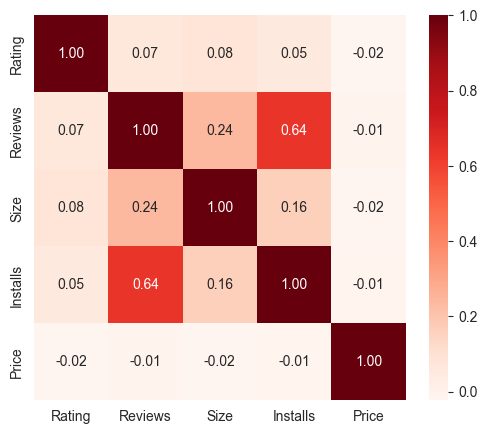

In [274]:
# Only include numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

f, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='Reds', ax=ax)
plt.show()

### Ratings Histogram for the dataset

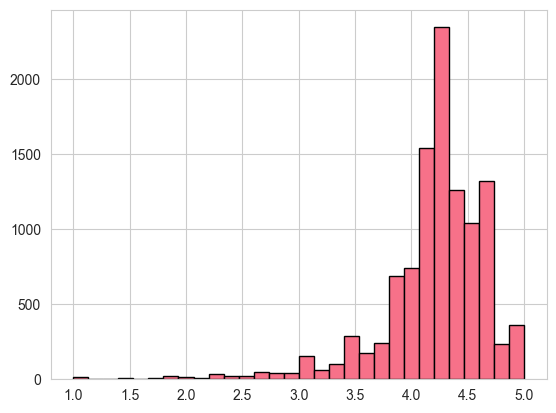

In [275]:
plt.hist(df['Rating'], bins=30, edgecolor='k');

We see that the ratings form a right skewed histogram, indicating that most of the ratings were above avarage.

### Category Analysis

#### Category vs Rating

In [276]:
# Statistics if all the categories
# dfCat['Rating'].mean()
dfCat['Rating'].agg(['median', 'mean', 'count'])

,median,mean,count
Category,,,
ART_AND_DESIGN,4.400000,4.358065,65
AUTO_AND_VEHICLES,4.200000,4.190411,85
BEAUTY,4.278571,4.278571,53
BOOKS_AND_REFERENCE,4.346067,4.346067,231
BUSINESS,4.121452,4.121452,460
COMICS,4.350000,4.155172,60
COMMUNICATION,4.200000,4.158537,387
DATING,4.000000,3.970769,234
EDUCATION,4.400000,4.389032,156


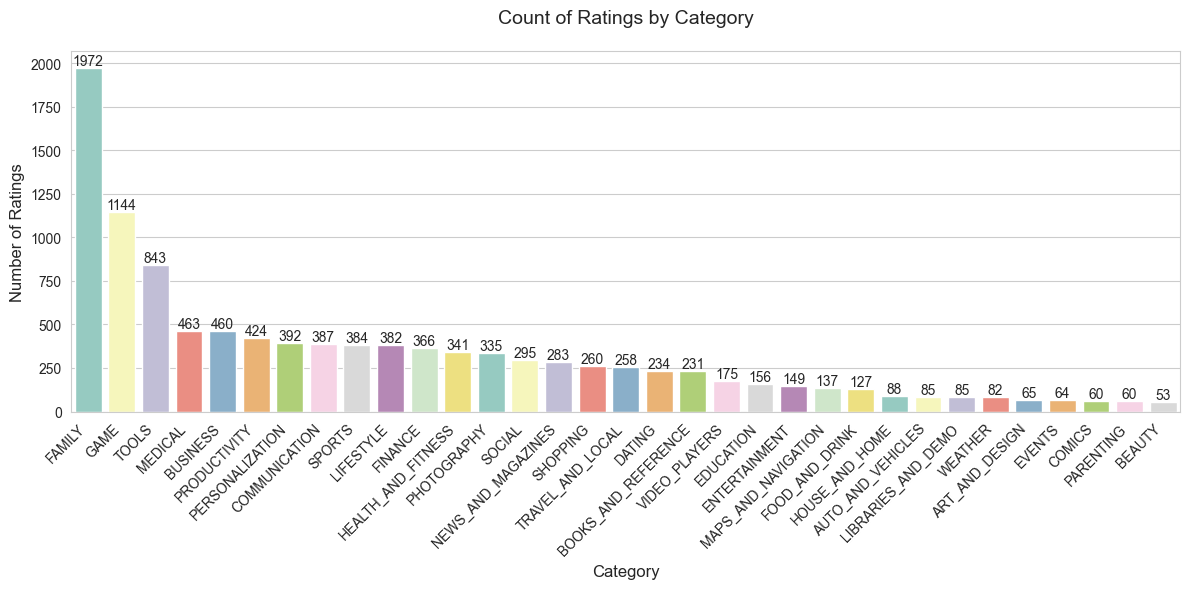

In [277]:
# Get the count data
category_counts = dfCat['Rating'].count().reset_index()
category_counts.columns = ['Category', 'Count']

# Sort the values
new_index = (category_counts['Count'].sort_values(ascending=False)).index.values
category_counts = category_counts.reindex(new_index)

# Create the basic plot in Seaborn
plt.subplots(figsize=(12, 6))

ax = sns.barplot(data=category_counts,
                x='Category',
                y='Count',
                # color='skyblue',
                # edgecolor='black'
                palette='Set3',
                hue='Category',
)

# Add value labels on top of each bar
for i, v in enumerate(category_counts['Count']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.title('Count of Ratings by Category', pad=20, size=14)
plt.xlabel('Category', size=12)
plt.ylabel('Number of Ratings', size=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

We see that the users using 'FAMILY' apps have maximum voting in the survey, followed by 'GAME' apps users closely followed by 'TOOLS' apps users.

#### Category vs Reviews

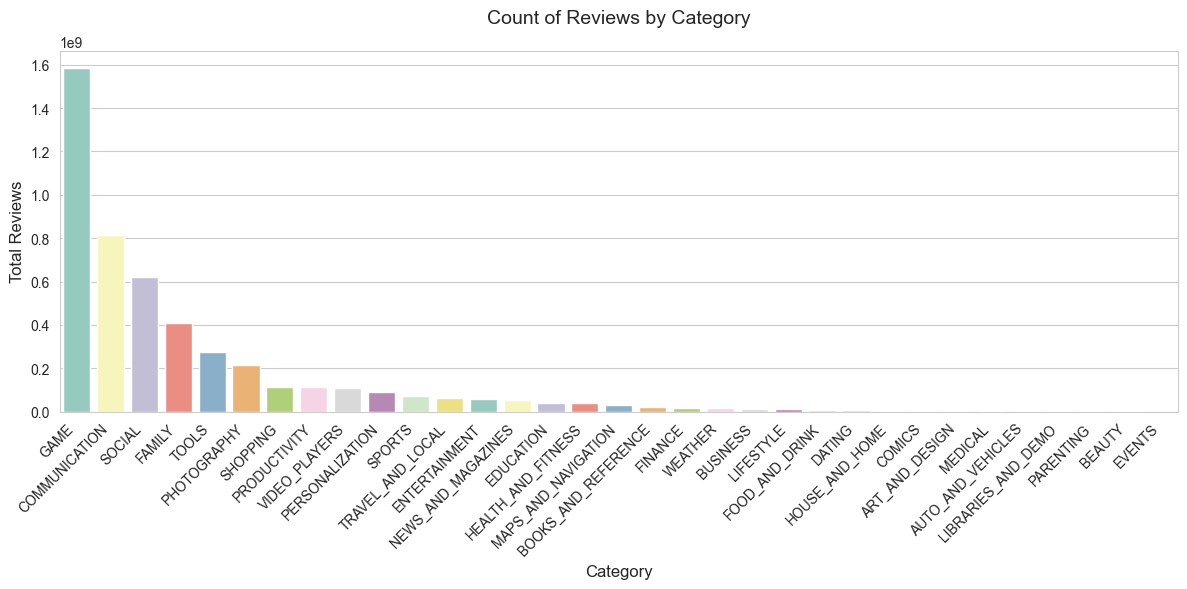

In [278]:
# Get the count data
category_review_total = dfCat['Reviews'].sum().reset_index()
category_review_total.columns = ['Category', 'Sum']


# Sort the values
new_index = (category_review_total['Sum'].sort_values(ascending=False)).index.values
category_review_total = category_review_total.reindex(new_index)

# Create the basic plot in Seaborn
plt.subplots(figsize=(12, 6))

ax = sns.barplot(data=category_review_total,
                 x='Category',
                 y='Sum',
                 palette='Set3',
                 hue='Category',
                 # edgecolor='black'
)

# # Add value labels on top of each bar
# for i, v in enumerate(category_review_total['Sum']):
#     ax.text(i, v, str(v), ha='center', va='bottom')

plt.title('Count of Reviews by Category', pad=20, size=14)
plt.xlabel('Category', size=12)
plt.ylabel('Total Reviews', size=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

We see that the users using 'GAME' apps have maximum number of reviews in the survey, followed by 'COMMUNICATION' apps users closely followed by 'SOCIAL' apps users.

### Category vs Reviews

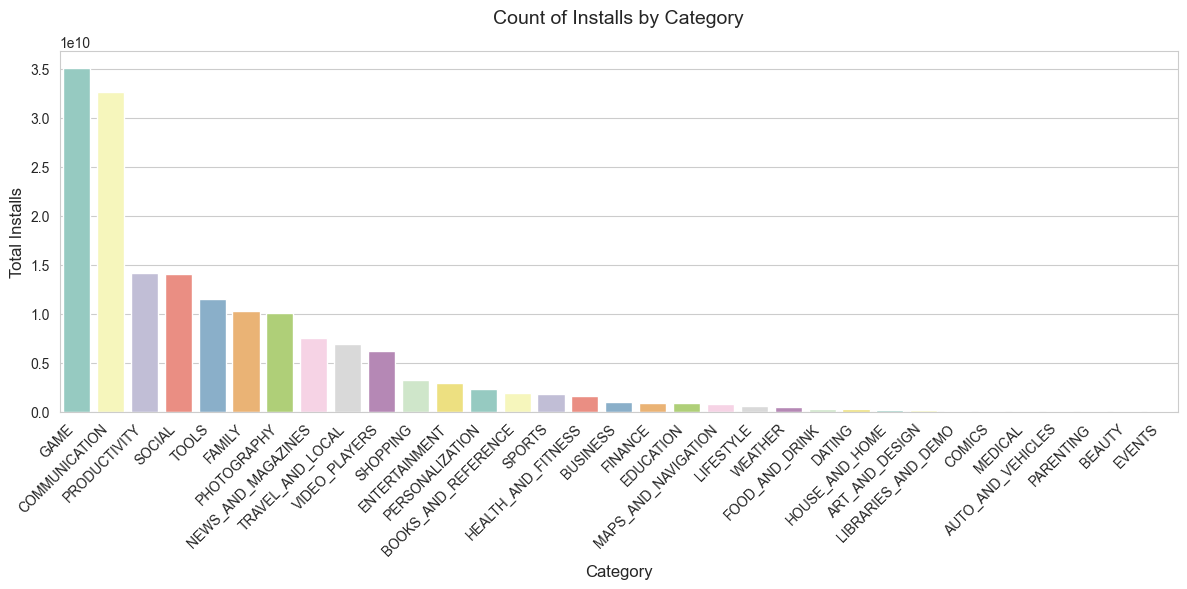

In [279]:
# Get the count data
category_installs_total = dfCat['Installs'].sum().reset_index()
category_installs_total.columns = ['Category', 'Sum']


# Sort the values
new_index = (category_installs_total['Sum'].sort_values(ascending=False)).index.values
category_installs_total = category_installs_total.reindex(new_index)

# Create the basic plot in Seaborn
plt.subplots(figsize=(12, 6))

ax = sns.barplot(data=category_installs_total,
                 x='Category',
                 y='Sum',
                 palette='Set3',
                 hue='Category',
                 # edgecolor='black'
)

# # Add value labels on top of each bar
# for i, v in enumerate(category_review_total['Sum']):
#     ax.text(i, v, str(v), ha='center', va='bottom')

plt.title('Count of Installs by Category', pad=20, size=14)
plt.xlabel('Category', size=12)
plt.ylabel('Total Installs', size=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

We see that the users using 'GAME' apps have maximum number of reviews in the survey, closely followed by 'COMMUNICATION' apps users, followed by 'PRODUCTIVITY' apps users.

### Category vs Price

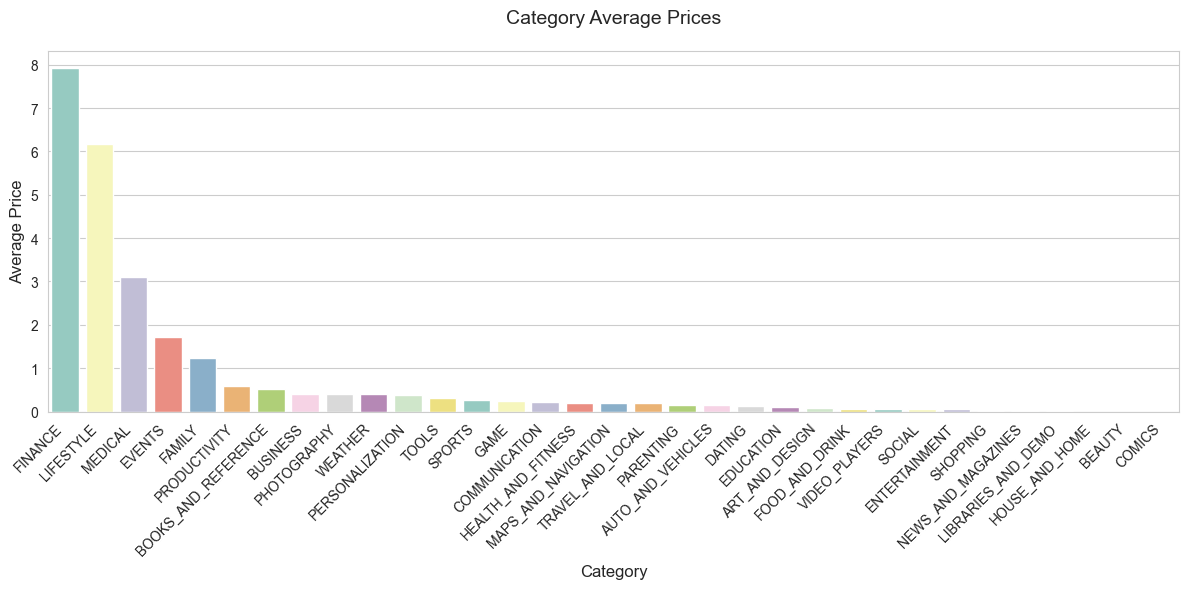

In [280]:
# Get the count data
category_price_expensive = dfCat['Price'].mean().reset_index()
category_price_expensive.columns = ['Category', 'Average']


# Sort the values
new_index = (category_price_expensive['Average'].sort_values(ascending=False)).index.values
category_price_expensive = category_price_expensive.reindex(new_index)

# Create the basic plot in Seaborn
plt.subplots(figsize=(12, 6))

ax = sns.barplot(data=category_price_expensive,
                 x='Category',
                 y='Average',
                 palette='Set3',
                 hue='Category',
                 # edgecolor='black'
)

# # Add value labels on top of each bar
# for i, v in enumerate(category_review_total['Sum']):
#     ax.text(i, v, str(v), ha='center', va='bottom')

plt.title('Category Average Prices', pad=20, size=14)
plt.xlabel('Category', size=12)
plt.ylabel('Average Price', size=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

On an Average a 'FINANCE' related app is the most expensive to buy, followed by 'LIFESTYLE', 'Medical' and 'EVENTS'.

## Price

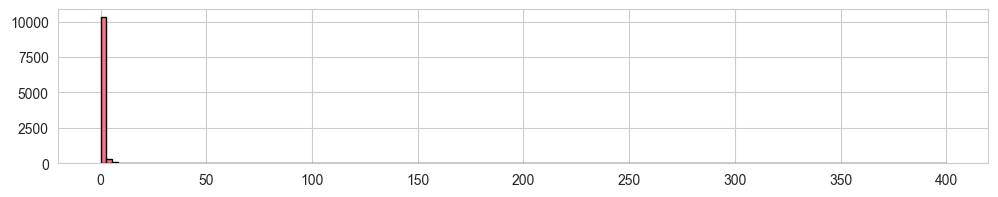

In [281]:
plt.subplots(figsize=(12, 2))
plt.hist(df['Price'], bins=150, edgecolor='k');

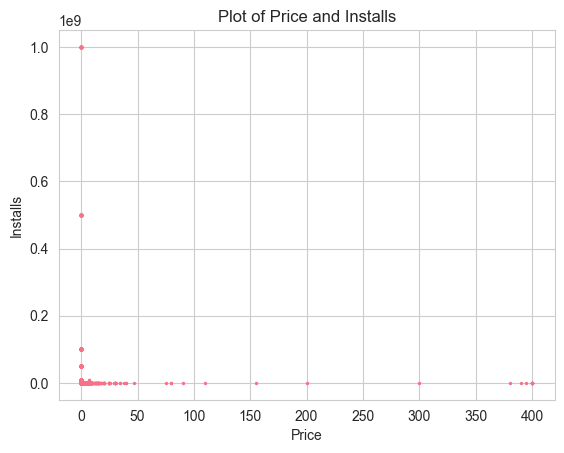

In [282]:
# Create a scatter plot
plt.scatter(df['Price'], df['Installs'], s = 2)
plt.xlabel('Price')
plt.ylabel('Installs')
plt.title('Plot of Price and Installs')
plt.show()

This shows that obviously the free apps are downloaded ay more that any paid apps.

Now lets cmpare only the paid apps.

In [283]:
filt = (df['Price'] > 0.0)
paid_apps_price = df['Price'].loc[filt]
paid_apps_installs = df['Installs'].loc[filt]
paid_apps_installs

234      100000.0
235      100000.0
290      100000.0
291      100000.0
427      100000.0
           ...   
10735       100.0
10760      1000.0
10782     10000.0
10785     10000.0
10798        50.0
Name: Installs, Length: 800, dtype: float64

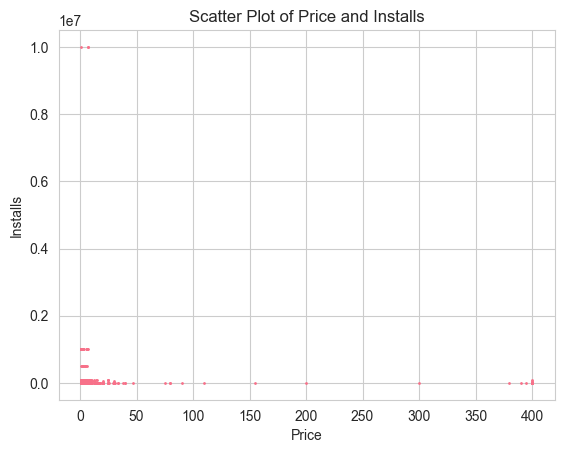

In [284]:
# Create a scatter plot
# plt.hist(df['Rating'], bins=30, edgecolor='k');
plt.scatter(paid_apps_price, paid_apps_installs, s = 1)
plt.xlabel('Price')
plt.ylabel('Installs')
plt.title('Scatter Plot of Price and Installs')
plt.show()

### Market Distribution of the app categories

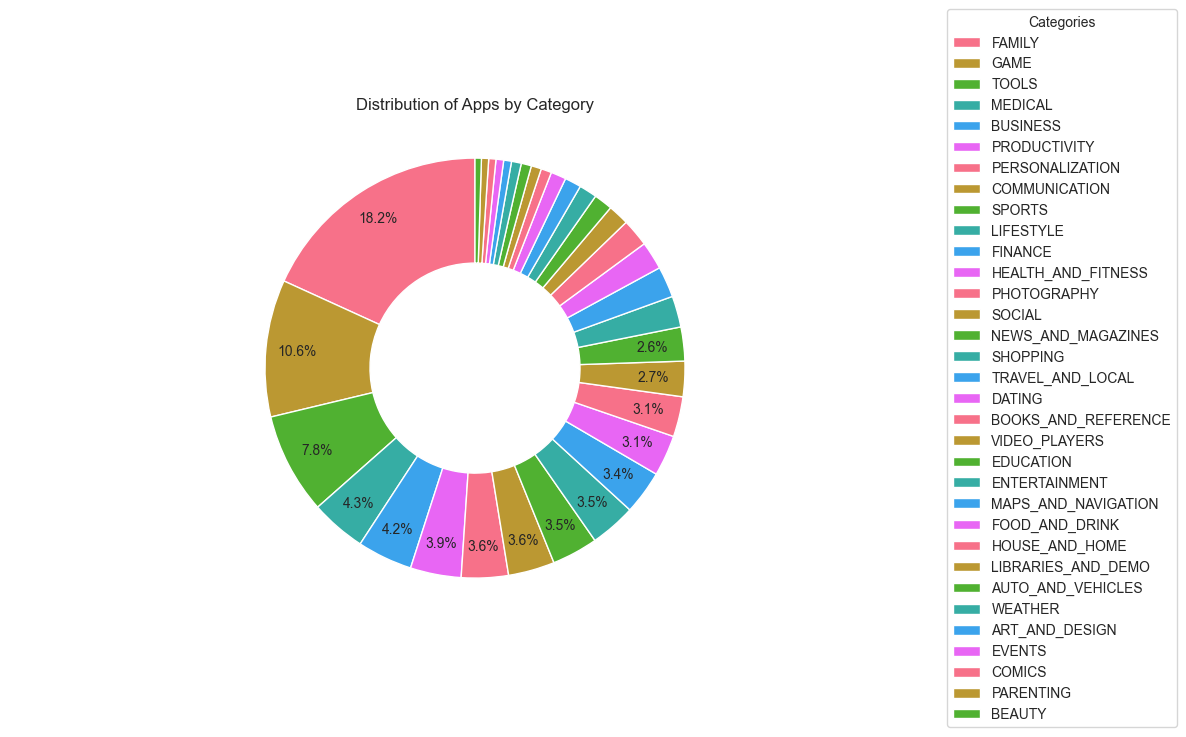

In [285]:
apps_count_in_category = df['Category'].value_counts().sort_values(ascending=False)

# Set style and color palette
sns.set_style("whitegrid")
sns.set_palette("husl")

# Create figure
plt.figure(figsize=(12, 6))

# Create donut chart
plt.pie(apps_count_in_category, 
        labels=[""] * len(apps_count_in_category),
        autopct=lambda pct: f'{pct:.1f}%' if pct > 2.5 else '',  # Only show percentages > 3%
        startangle=90,
        pctdistance=0.85,  # The ratio between the center circle and the edges
        wedgeprops=dict(width=0.5))  # Creates the donut shape

# Add legend to the right
plt.legend(apps_count_in_category.index, 
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Apps by Category', pad=20)
plt.axis('equal')

plt.show()

In [286]:
# Easier and better with plotly
# Interactive as well, Try hovering over the pie chart
apps_count_in_category = df['Category'].value_counts().sort_values(ascending=False)

data = [go.Pie(
        labels = apps_count_in_category.index,
        values = apps_count_in_category.values,
        hoverinfo = 'label+value'
    
)]

plotly.offline.iplot(data, filename='active_category')

### Category wise performance in Ratings

In [287]:
groups = dfCat.filter(lambda x: len(x) >= 150).reset_index()
print('Average rating = ', np.nanmean(list(groups['Rating'])))

c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 720, len(set(groups.Category)))]

layout = {'title' : 'Major categories Ratings split',
        'xaxis': {'tickangle':-40},
        'yaxis': {'title': 'Rating'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': [{
              'type' :'line',
              'x0': -.5,
              'y0': np.nanmean(list(groups.Rating)),
              'x1': 21,
              'y1': np.nanmean(list(groups.Rating)),
              'line': { 'dash': 'dashdot'}
          }]
          }

data = [{
    'y': df.loc[df.Category==category]['Rating'], 
    'type':'violin',
    'name' : category,
    'showlegend':False,
    } for i,category in enumerate(list(set(groups.Category)))]



plotly.offline.iplot({'data': data, 'layout': layout})



Average rating =  4.189626116153367


- The **Education** apps seem to be rated above **3.5** and perform well.
- **Game**, **Books and Reference**, and **Health and Fitness** apps are doing good as well.
- It is shows that the **DATING** apps do the worst as compared to other categories as their average is below the averag of all the apps.



### Now lets look at how size of the apps affect their ratings

Text(0.5, 1.02, 'Rating Vs Size')

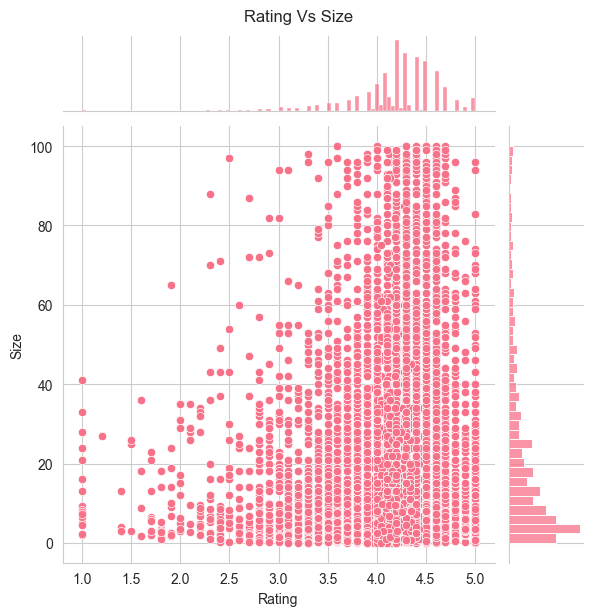

In [288]:
groups = df.groupby('Category').filter(lambda x: len(x) >= 50).reset_index()

# Create joint plot
ax = sns.jointplot(x='Rating', y='Size', data=groups)

# Add title - need to use fig attribute
ax.fig.suptitle('Rating Vs Size', y=1.02)  # y parameter adjusts title height

Most top rated apps are <= 20MB.

### Now lets look at how price of the apps affect their ratings

Text(0.5, 1.02, 'Rating Vs Price')

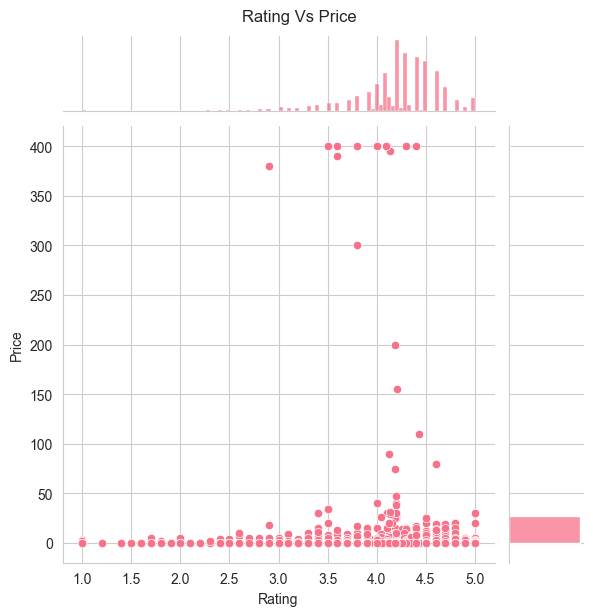

In [289]:
groups = df.groupby('Category').filter(lambda x: len(x) >= 50).reset_index()

# Create joint plot
ax = sns.jointplot(x='Rating', y='Price', data=groups)

# Add title - need to use fig attribute
ax.fig.suptitle('Rating Vs Price', y=1.02)  # y parameter adjusts title height

- Most top rated apps are priced <= \$25
- There are only a very few apps priced above 25\$.

Lets check these outlying apps charging above $100

In [290]:
#print('Junk apps priced above 350$')
df[['Category', 'App', 'Price']][df.Price > 100]

,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


Most of these apps are not ususal.

### Now lets look at how Size of the apps affect their number of reviews

Text(0.5, 1.02, 'Installs Vs Price')

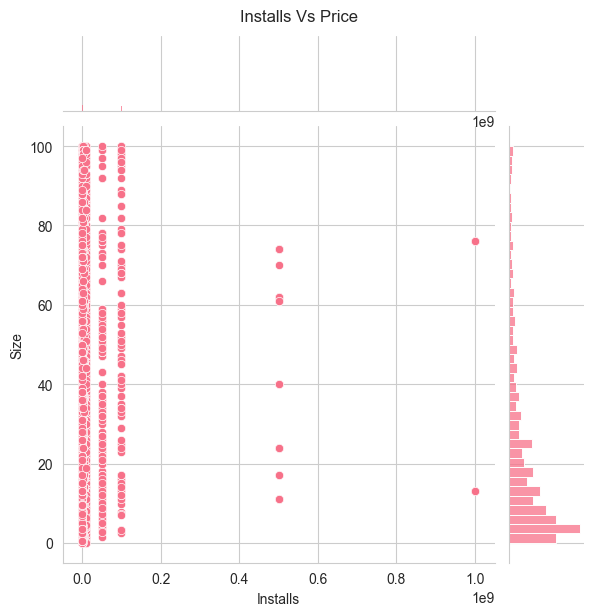

In [291]:
groups = df.groupby('Category').filter(lambda x: len(x) >= 50).reset_index()

# Create joint plot
ax = sns.jointplot(x='Installs', y='Size', data=groups)

# Add title - need to use fig attribute
ax.fig.suptitle('Installs Vs Price', y=1.02)  # y parameter adjusts title height

Most of the apps that were reviewed were ~<=40MB in size

### Amount of paid and Free apps in each Category

In [292]:
# Gather the paid and free apps in each category

dfCatPaid = df[df['Type'] == 'Paid']
dfCatFree = df[df['Type'] == 'Free']

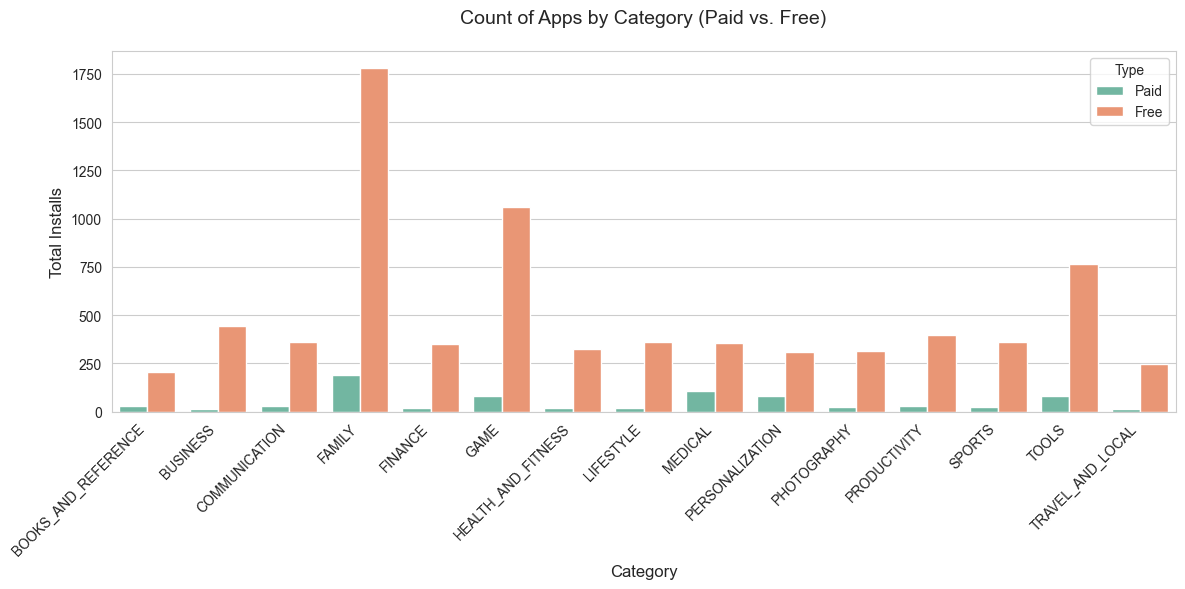

In [293]:
# PLot bar graph

# Count the number of occurrences for Paid and Free
category_paid = dfCatPaid.groupby('Category')['Type'].count().reset_index()
category_free = dfCatFree.groupby('Category')['Type'].count().reset_index()

# Rename for clarity
category_paid.columns = ['Category', 'Count']
category_free.columns = ['Category', 'Count']

# Filter to keep only categories with at least 10 Paid apps
category_paid = category_paid[category_paid['Count'] >= 10]

# Merge with Free apps but only for the selected categories
category_free = category_free[category_free['Category'].isin(category_paid['Category'])]

# Add a "Type" column to distinguish the datasets
category_paid['Type'] = 'Paid'
category_free['Type'] = 'Free'

# Combine both datasets
category_combined = pd.concat([category_paid, category_free])

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=category_combined,
                 x='Category',
                 y='Count',
                 hue='Type',  # Differentiate Free vs. Paid
                 palette='Set2')

plt.title('Count of Apps by Category (Paid vs. Free)', pad=20, size=14)
plt.xlabel('Category', size=12)
plt.ylabel('Total Installs', size=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In the above comparison we considered only those Categories that had atleast 10 Paid Apps.

## Sentiment Analysis

In [294]:
reviews_df = pd.read_csv('googleplaystore_user_reviews.csv')
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [295]:
merged_df = pd.merge(df, reviews_df, on = "App", how = "inner")
merged_df = merged_df.dropna()
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [296]:
# Group the mergeed_df by Category and Sentiment -> get the count
grouped_sentiment_category_count = merged_df.groupby(['Category', 'Sentiment']).agg({'App': 'count'}).reset_index()
# print(grouped_sentiment_category_count)

# Group the mergeed_df by Category -> get the count
grouped_sentiment_category_total = merged_df.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()
# print(grouped_sentiment_category_sum)

# Merge the two groups
merged_grouped_df = pd.merge(grouped_sentiment_category_count, grouped_sentiment_category_total, on=["Category"])
# merged_grouped_df

# merged_grouped_df = merged_grouped_df.groupby('Category').filter(lambda x: len(x) ==3)
# Normalize the three Sentiment counts wrt to the total sentiment count and store in a new column as percentage.
merged_grouped_df['Sentiment_Normalized'] = (100 * merged_grouped_df['App'] / merged_grouped_df['Sentiment_y'])

# merged_grouped_check = merged_grouped_df.groupby('Category').agg({'Sentiment_Normalized':'sum'})
merged_grouped_df

,Category,Sentiment_x,App,Sentiment_y,Sentiment_Normalized
0,ART_AND_DESIGN,Negative,58,345,16.811594
1,ART_AND_DESIGN,Neutral,54,345,15.652174
2,ART_AND_DESIGN,Positive,233,345,67.536232
3,AUTO_AND_VEHICLES,Negative,11,164,6.707317
4,AUTO_AND_VEHICLES,Neutral,20,164,12.195122
5,AUTO_AND_VEHICLES,Positive,133,164,81.097561
6,BEAUTY,Negative,57,302,18.874172
7,BEAUTY,Neutral,83,302,27.483444
8,BEAUTY,Positive,162,302,53.642384
9,BOOKS_AND_REFERENCE,Negative,27,314,8.598726


In [297]:
# plot as a bar graph depicting all three sentiments.
trace1 = go.Bar(
    x=merged_grouped_df[merged_grouped_df['Sentiment_x'] == 'Negative']['Category'],
    y=merged_grouped_df[merged_grouped_df['Sentiment_x'] == 'Negative']['Sentiment_Normalized'],
    name='Negative',
    marker=dict(color='rgb(255, 160, 160)')
)

trace2 = go.Bar(
    x=merged_grouped_df[merged_grouped_df['Sentiment_x'] == 'Neutral']['Category'],
    y=merged_grouped_df[merged_grouped_df['Sentiment_x'] == 'Neutral']['Sentiment_Normalized'],
    name='Neutral',
    marker=dict(color='rgb(160, 200, 255)')
)

trace3 = go.Bar(
    x=merged_grouped_df[merged_grouped_df['Sentiment_x'] == 'Positive']['Category'],
    y=merged_grouped_df[merged_grouped_df['Sentiment_x'] == 'Positive']['Sentiment_Normalized'],
    name='Positive',
    marker=dict(color='rgb(188, 206, 178)')
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'Sentiment analysis',
    barmode='stack',
    xaxis = {'tickangle': -45},
    yaxis = {'title': 'Fraction of reviews'}
)

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot({'data': data, 'layout': layout})

- We can see that Auto and Vehicles apps have the highest positive reviews.
- Game apps have the most Negative reviews, which can be due to the endless bugs a games can encounter as compared to other apps.

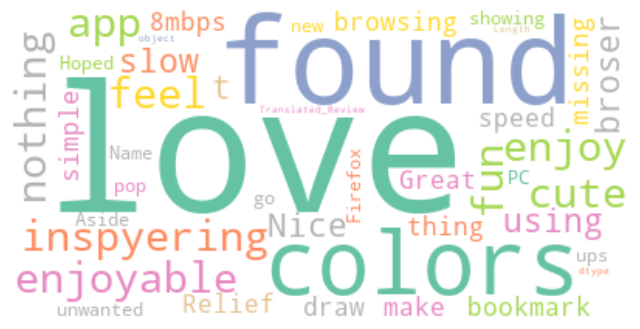

In [298]:
# from nltk.corpus import stopwords
stop = stopwords.words('english')
stop = stop + ['app', 'APP' ,'ap', 'App', 'apps', 'application', 'browser', 'website', 'websites', 'chrome', 'click', 'web', 'ip', 'address',
            'files', 'android', 'browse', 'service', 'use', 'one', 'download', 'email', 'Launcher']

#merged_df = merged_df.dropna(subset=['Translated_Review'])
merged_df['Translated_Review'] = merged_df['Translated_Review'].apply(lambda x: " ".join(x for x in str(x).split(' ') if x not in stop))
#print(any(merged_df.Translated_Review.isna()))
merged_df.Translated_Review = merged_df.Translated_Review.apply(lambda x: x if 'app' not in x.split(' ') else np.nan)
merged_df.dropna(subset=['Translated_Review'], inplace=True)


positive = merged_df.loc[merged_df['Sentiment']=='Positive']['Translated_Review'].apply(lambda x: '' if x=='nan' else x)
wc.generate(''.join(str(positive)))
plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

This is the wordcloud for positive words

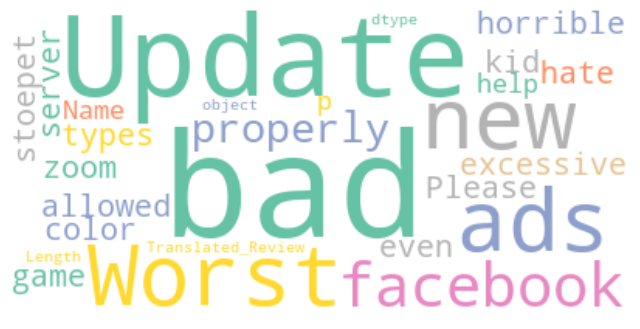

In [299]:
negative = merged_df.loc[merged_df['Sentiment']=='Negative']['Translated_Review'].apply(lambda x: '' if x=='nan' else x)
wc.generate(''.join(str(negative)))
plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

This is the wordcloud for negative words

## Conclusion

- The ratings form a right skewed histogram, indicating that most of the ratings were above avarage.
- The users using 'FAMILY' apps have maximum voting in the survey, followed by 'GAME' apps users closely followed by 'TOOLS' apps users.
- The users using 'GAME' apps have maximum number of reviews in the survey, followed by 'COMMUNICATION' apps users closely followed by 'SOCIAL' apps users
- The users using 'GAME' apps have maximum number of reviews in the survey, closely followed by 'COMMUNICATION' apps users, followed by 'PRODUCTIVITY' apps users.
- On an Average a 'FINANCE' related app is the most expensive to buy, followed by 'LIFESTYLE', 'Medical' and 'EVENTS'.
- The Education apps seem to be rated above 3.5 and perform well.
- Game, Books and Reference, and Health and Fitness apps are doing good as well.
- It is shows that the DATING apps do the worst as compared to other categories as their average is below the averag of all the apps.
- Most top rated apps are **<= 20MB**.
- Most top rated apps are priced **<= \$25**
- There are only a very few apps priced above **\$25**.
- We can see that Auto and Vehicles apps have the highest positive reviews.
- Game apps have the most Negative reviews, which can be due to the endless bugs a games can encounter as compared to other apps.